In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("pokemon.csv")
df.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
pid          800 non-null int64
Name         799 non-null object
Class 1      800 non-null object
Class 2      414 non-null object
HP           800 non-null int64
Attack       800 non-null int64
Defense      800 non-null int64
Sp. Atk      800 non-null int64
Sp. Def      800 non-null int64
Speed        800 non-null int64
Legendary    800 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Description of dataset

We have 800 pokemons, they don't always have a second class and it misses one name.

In [4]:
df.describe()


,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [5]:
df["Class 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Repartition of first classes

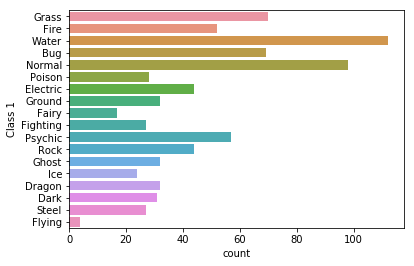

In [6]:
sns.countplot(y="Class 1", data=df)


Repartition of second classes

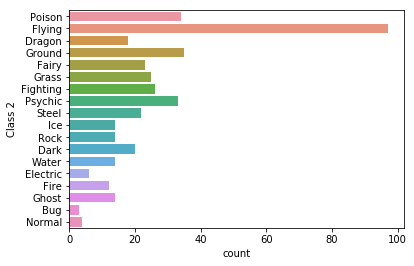

In [7]:
sns.countplot(y="Class 2", data=df)


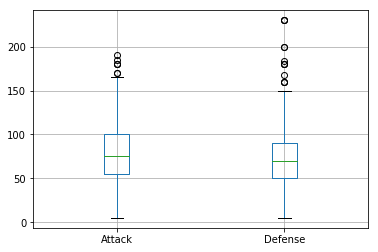

In [8]:
df[["Attack", "Defense"]].boxplot()


The repartition of regular attack and defense are similars

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15e2de10>,
      dtype=object)

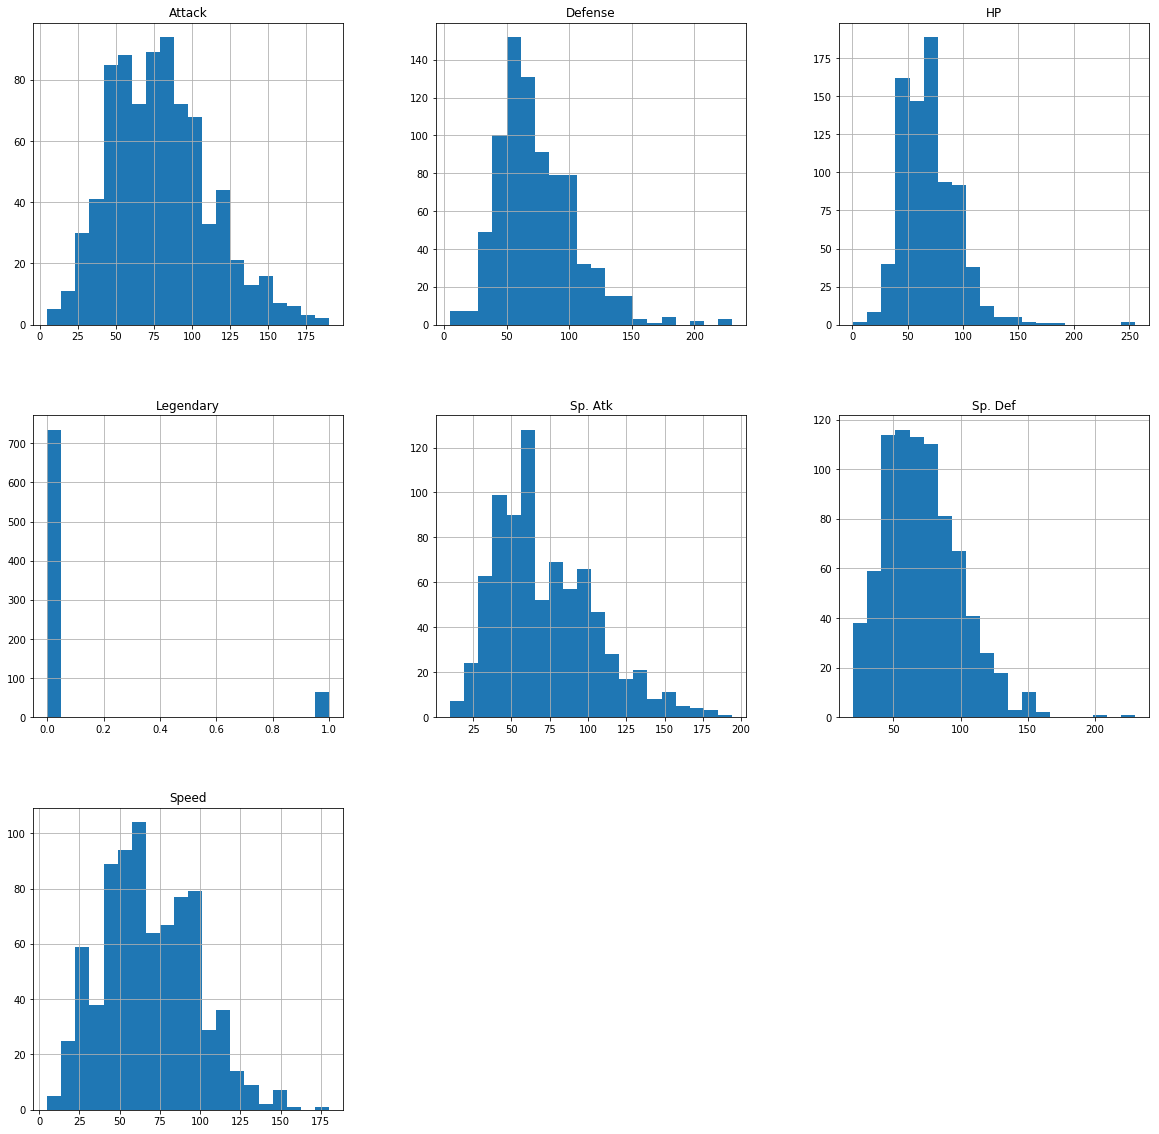

In [9]:
df[["Attack", "Defense", "HP", "Legendary", "Sp. Atk", "Sp. Def", "Speed"]].hist(figsize=(20, 20), bins=20)


All the attributes seem to have a gaussian repartition. 8% of pokemons are Legendary.

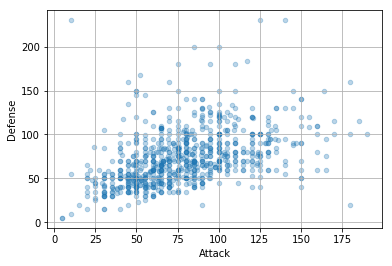

In [10]:
df.plot(x = "Attack", y = "Defense", kind="scatter", alpha=0.3).grid(True)


In [11]:
df["Attack"].corr(df["Defense"])


0.4386870551184897

Attack and Defense look a little bit correlated.

In [12]:
df["Att-Over-Def"] = df["Attack"]/df["Defense"]
df["Att-Over-Def"].head()
df.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Att-Over-Def
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,1.000000
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,0.984127
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,0.987952
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,0.813008
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,1.209302


3 Pokémon with highest attack-over-defense ratio

In [13]:
df.nlargest(3, "Att-Over-Def")["Name"].tolist()


['DeoxysAttack Forme', 'Carvanha', 'Mega Beedrill']

3 Pokémon with smallest attack-over-defense ratio 

In [14]:
df.nsmallest(3, "Att-Over-Def")["Name"].tolist()


['Shuckle', 'Magikarp', 'Bronzor']

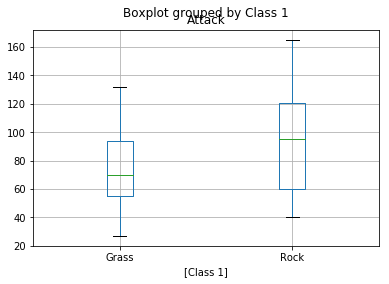

In [15]:
df[["Attack", "Class 1"]].loc[(df['Class 1'] == 'Grass') | (df['Class 1'] == 'Rock')].boxplot(by="Class 1")


Rock typed pokemons tend to have a better mean, max, min and median attack in contrary to Professor Oak.

In [16]:
combats = pd.read_csv("combats.csv")
combats.head()


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [17]:
combats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
First_pokemon     50000 non-null int64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


In [18]:
combats.First_pokemon.nunique()


784

In [19]:
combats["P1_wins"] = np.where(combats['First_pokemon']==combats['Winner'], 1, 0)
fights = combats.set_index("First_pokemon")
df1 = df.join(fights, on="pid", how="inner")
data = df1.join(df.set_index("pid"), on="Second_pokemon", rsuffix="_2")
data.head()


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Class 1_2,Class 2_2,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Legendary_2,Att-Over-Def_2
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,Bug,NaN,80,70,40,100,60,145,False,1.750000
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,Dark,Steel,65,125,100,60,70,70,False,1.250000
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,Grass,NaN,75,75,95,75,95,113,False,0.789474
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,Electric,Normal,62,55,52,109,94,109,False,1.057692
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,Rock,Water,60,115,105,65,70,80,False,1.095238


In [20]:
data.columns.tolist()


['pid',
 'Name',
 'Class 1',
 'Class 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Legendary',
 'Att-Over-Def',
 'Second_pokemon',
 'Winner',
 'P1_wins',
 'Name_2',
 'Class 1_2',
 'Class 2_2',
 'HP_2',
 'Attack_2',
 'Defense_2',
 'Sp. Atk_2',
 'Sp. Def_2',
 'Speed_2',
 'Legendary_2',
 'Att-Over-Def_2']

In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 799
Data columns (total 26 columns):
pid               50000 non-null int64
Name              49944 non-null object
Class 1           50000 non-null object
Class 2           25969 non-null object
HP                50000 non-null int64
Attack            50000 non-null int64
Defense           50000 non-null int64
Sp. Atk           50000 non-null int64
Sp. Def           50000 non-null int64
Speed             50000 non-null int64
Legendary         50000 non-null bool
Att-Over-Def      50000 non-null float64
Second_pokemon    50000 non-null int64
Winner            50000 non-null int64
P1_wins           50000 non-null int64
Name_2            49948 non-null object
Class 1_2         50000 non-null object
Class 2_2         26015 non-null object
HP_2              50000 non-null int64
Attack_2          50000 non-null int64
Defense_2         50000 non-null int64
Sp. Atk_2         50000 non-null int64
Sp. Def_2         50000 non-

In [22]:
X = data.drop(['pid', 'Second_pokemon', 'Winner', 'P1_wins', 'Name', 'Name_2'], axis=1)
X[['Legendary', 'Legendary_2']].astype(int)
X.columns


Index(['Class 1', 'Class 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Legendary', 'Att-Over-Def', 'Class 1_2', 'Class 2_2', 'HP_2',
       'Attack_2', 'Defense_2', 'Sp. Atk_2', 'Sp. Def_2', 'Speed_2',
       'Legendary_2', 'Att-Over-Def_2'],
      dtype='object')

In [23]:
Y = data["P1_wins"]


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_num = X_train.drop(['Class 1', 'Class 2', 'Class 1_2', 'Class 2_2'], axis=1)

In [25]:
X_train_num.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Att-Over-Def,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Legendary_2,Att-Over-Def_2
623,38,30,85,55,65,30,False,0.352941,70,45,48,60,65,35,False,0.937500
493,108,130,95,80,85,102,False,1.368421,65,136,94,54,96,135,False,1.446809
722,59,59,58,90,70,73,False,1.017241,70,80,102,80,102,40,False,0.784314
263,115,115,85,90,75,100,True,1.352941,61,90,45,50,50,160,False,2.000000
220,75,90,140,60,60,40,False,0.642857,74,94,131,54,116,20,False,0.717557


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_clf = LogisticRegression(solver="liblinear", random_state=42)
log_clf.fit(X_train_num, y_train)
preds = log_clf.predict(X_train_num)
confusion_matrix(y_train, preds)

array([[18953,  2142],
       [ 2292, 16613]])

In [28]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_train_num, y_train)
preds = rnd_clf.predict(X_train_num)
confusion_matrix(y_train, preds)


array([[21053,    42],
       [  122, 18783]])

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train_num, y_train)
preds = tree_clf.predict(X_train_num)
confusion_matrix(y_train, preds)

array([[16513,  4582],
       [ 2709, 16196]])

# Prediction models

We tested 3 simple models with good global interpretability: Logistic Regression, Random Forest and Decision Trees.

These 3 classifiers can also give prediction probability for Professor Oak.

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_clf, X_train_num, y_train, cv=5)
print("Logistic regression accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(rnd_clf, X_train_num, y_train, cv=5)
print("Random Forest accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(tree_clf, X_train_num, y_train, cv=5)
print("Decision Tree accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic regression accuracy: 0.89 (+/- 0.01)
Random Forest accuracy: 0.94 (+/- 0.00)
Decision Tree accuracy: 0.81 (+/- 0.01)


# Winner : Random Forest

Random Forest classifier sounds the best classifier with cross validation method.

Feature ranking:
1. feature 5 (0.324352)
2. feature 13 (0.302266)
3. feature 1 (0.044059)
4. feature 9 (0.039334)
5. feature 11 (0.036345)
6. feature 3 (0.033281)
7. feature 7 (0.032519)
8. feature 8 (0.030510)
9. feature 15 (0.029913)
10. feature 0 (0.027374)
11. feature 10 (0.024194)
12. feature 12 (0.024111)
13. feature 2 (0.023010)
14. feature 4 (0.022833)
15. feature 14 (0.003916)
16. feature 6 (0.001984)


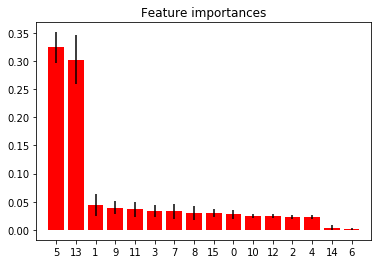

In [34]:
importances = rnd_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_num.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_num.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_num.shape[1]), indices)
plt.xlim([-1, X_train_num.shape[1]])
plt.show()

In [36]:
X_train_num.columns[5]

'Speed'

In [37]:
X_train_num.columns[13]

'Speed_2'

In [41]:
X_train_num.columns[14]

'Legendary_2'

In [42]:
X_train_num.columns[6]

'Legendary'

The most important features are Speed and Attack in the Random Forest Classifier.

In [46]:
df.loc[(df['Legendary'] == 1)]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Att-Over-Def
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,0.850000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,1.058824
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,1.111111
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,1.222222
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,1.900000
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,2.142857
262,263,Raikou,Electric,NaN,90,85,75,115,100,115,True,1.133333
263,264,Entei,Fire,NaN,115,115,85,90,75,100,True,1.352941
264,265,Suicune,Water,NaN,100,75,115,90,115,85,True,0.652174
269,270,Lugia,Psychic,Flying,106,90,130,90,154,110,True,0.692308
